### Outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Convert JSON fields.
- Goal is to predict the **total transaction revenue**. 
- Split dataset into train and test dataset and Decide aboute a good evaluation strategy and justify your choice. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## TABLE OF CONTENTS

1. Data Preprocessing
2. Descriptive Analysis
3. Supervised Learning : Support Vector Regressor and Stochastic Gradient Descent
4. Unsupervised Learning : KMeans clustering and Gaussion Mixture
5. Dimensionality reduction : Principal Component Analysis(PCA) and Random Projections
6. Supervisied learning on reduced dimensions

Read the data in dataframe

In [2]:
df_customer =  pd.read_csv("C:/Users/shwts/Documents/MichelCave_Python/Project/data.csv", delimiter=",")

In [3]:
df_customer.head(2)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1


In [5]:
df_customer.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0


Describe helps to explore the features for the data distribution in them. It helps to understand how sparsely or densely the data is distributed and what are their statistical values like mean, mode, standard deviations

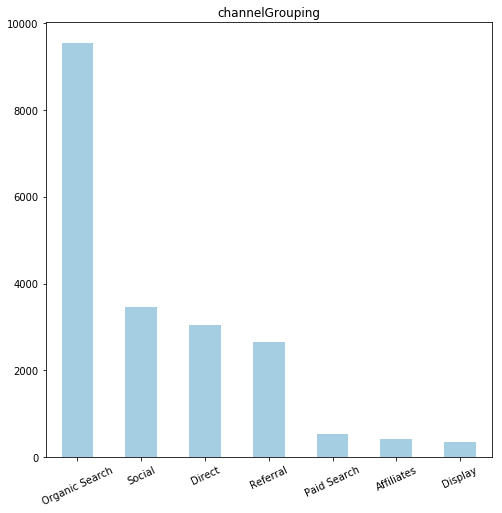

In [7]:
df_customer.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping",figsize=(8,8),rot=25,colormap='Paired')
plt.show()

From the above results we can see that the repetitiveness in customer is very low.

In [8]:
#Time column
import time
df_customer['date'] = pd.to_datetime(df_customer['visitStartTime'], unit='s')
df_customer["day"] = df_customer['date'].dt.day
df_customer['month'] = df_customer['date'].dt.month
df_customer['weekday'] = df_customer['date'].dt.weekday
df_customer['weekofyear'] = df_customer['date'].dt.weekofyear

In [9]:
#Check for relation between Revenue and visitNumber. Does more visits by customer means more revenue.
rev_date_day_df = df_customer[["totals_transactionRevenue" , "day"]].dropna()
rev_date_day_df["totals_transactionRevenue"] = rev_date_day_df.totals_transactionRevenue.astype(np.int64)
rev_date_day_df.head(2)

,totals_transactionRevenue,day
433,15190000,17
550,8000000,16


In [10]:
#Data preparation 
df_customer_date_ana = df_customer[['day','month','weekday','totals_transactionRevenue','visitNumber']].dropna()
df_customer_date_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 433 to 19790
Data columns (total 5 columns):
day                          193 non-null int64
month                        193 non-null int64
weekday                      193 non-null int64
totals_transactionRevenue    193 non-null float64
visitNumber                  193 non-null int64
dtypes: float64(1), int64(4)
memory usage: 9.0 KB


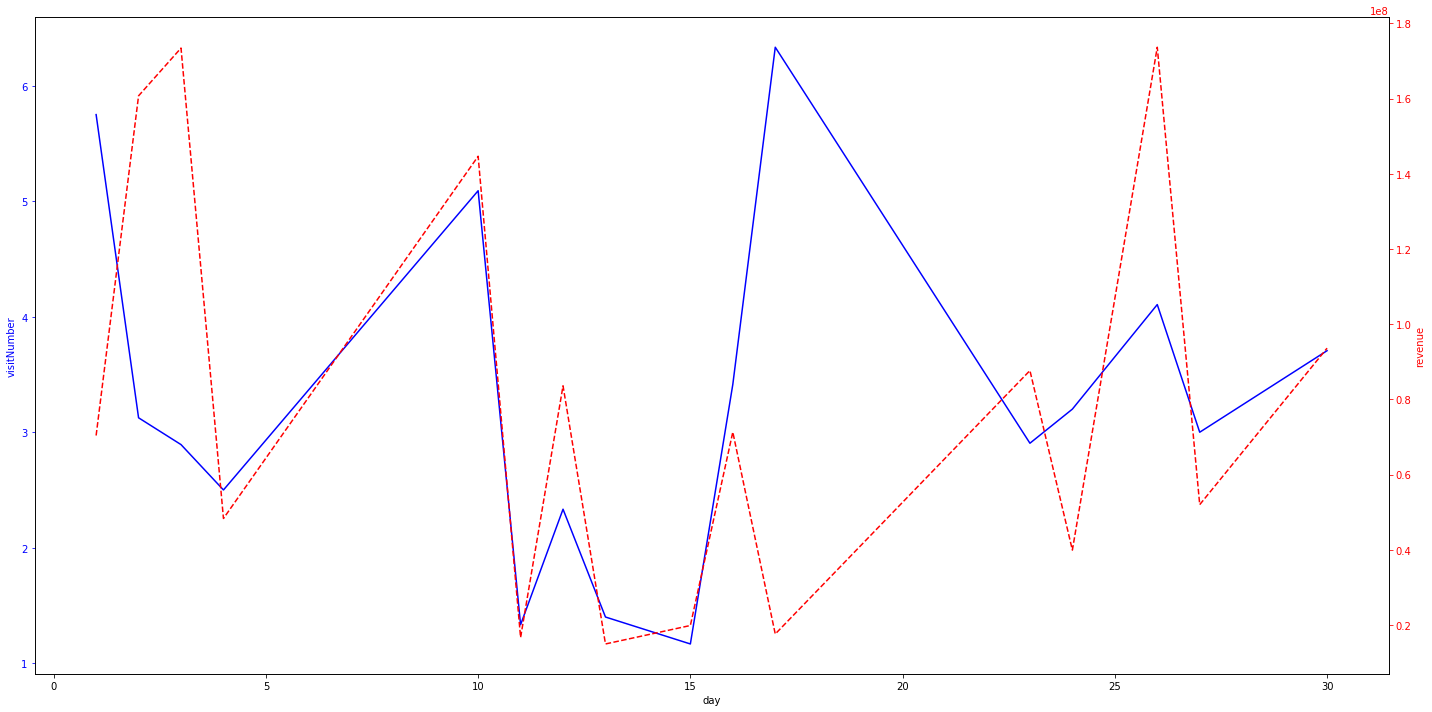

In [13]:
dt_revenue_visits_df = pd.concat([df_customer_day_wise,df_visit_day_wise],axis=1)

fig, ax1 = plt.subplots(figsize=(20,10))
t = dt_revenue_visits_df.index
s1 = dt_revenue_visits_df["visitNumber"]
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('day')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('visitNumber', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = dt_revenue_visits_df["totals_transactionRevenue"]
ax2.plot(t, s2, 'r--')
ax2.set_ylabel('revenue', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()

From the above graph we can see that not all days when the visits where high the revenue was also high but we can see that the days with low visit has low revenue.

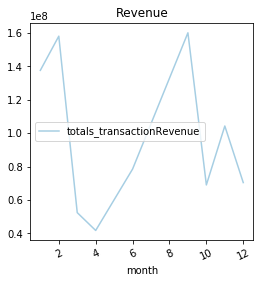

In [14]:
#Average revenue per day
df_customer_month_wise = df_customer_date_ana[['month','totals_transactionRevenue']].groupby('month').mean()
df_customer_month_wise.plot(title="Revenue",figsize=(4,4),rot=25,colormap='Paired')
plt.show()

From the above plot we can see that google received maximum revenue during Jan, Feb and Sep. And the least revenue is generated for the April month. Need to further check what deals or transactions where special reasons for more revenue in these months.

## DATA PRE-PROCESSING

### Retrieval of columns from dictionary columns

In [16]:
df_customer['customDCity'] = df_customer['customDimensions'].astype(str).str.strip('[]').str.strip('{}').str.split(': ', expand=True)[2]
#df_customer.drop('customDimensions', axis=1, inplace=True)

In [17]:
df_customer['device1'] = df_customer['device'].apply(lambda x : dict(eval(x)) )
df = df_customer['device1'].apply(pd.Series)
df.head(2)
df_customer['deviceCategory'] = df['deviceCategory']
df_customer['deviceOS'] = df['operatingSystem']
df_customer['deviceBrowser'] = df['browser']
#df_customer.drop(['device','device1'], axis = 1, inplace=True)
df_customer.head(1)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_visits,day,month,weekday,weekofyear,customDCity,device1,deviceCategory,deviceOS,deviceBrowser
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-17 00:00:50,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1,17,10,1,42,'EMEA',{'mobileDeviceInfo': 'not available in demo da...,desktop,Windows,Firefox


In [18]:
OS_2replace = ['(not set)','Windows Phone','Tizen','Samsung','Xbox','OS/2','BlackBerry','Nintendo Wii','Firefox OS','Playstation Vita']
for i in OS_2replace:
    df_customer['deviceOS'].replace(str(i), 'Others', inplace=True)

Windows      7651
Macintosh    4928
Android      3205
iOS          2583
Linux         812
Chrome OS     620
Others        201
Name: deviceOS, dtype: int64

From the above result set we can see that top 10 browsers contribute about 99.22% of total. So even if we club the other browsers to one category the effect of other merged browsers will be still less than 1%.

In [20]:
browser_2replace = ['ADM','SeaMonkey','Playstation Vita Browser','Maxthon','Nokia Browser','Nintendo Browser','Puffin','BlackBerry','Mozilla Compatible Agent','MRCHROME','Android Browser','Coc Coc','Amazon Silk','YaBrowser','UC Browser']
for i in browser_2replace:
    df_customer['deviceBrowser'].replace(str(i), 'Others', inplace=True)
    
df_customer['deviceBrowser'].replace('Safari (in-app)', 'Safari', inplace=True)
df_customer['deviceBrowser'].replace('Internet Explorer', 'InternetExplorer', inplace=True)
df_customer['deviceBrowser'].replace('Android Webview', 'AndroidWebview', inplace=True)
df_customer['deviceBrowser'].replace('Opera Mini', 'OperaMini', inplace=True)
df_customer['deviceBrowser'].replace('Samsung Internet', 'SamsungInternet', inplace=True)
df_customer['deviceBrowser'].value_counts()

Chrome              13978
Safari               3479
Firefox               829
InternetExplorer      530
AndroidWebview        300
Edge                  267
OperaMini             191
Others                155
SamsungInternet       137
Opera                 134
Name: deviceBrowser, dtype: int64

In [21]:
df_customer['deviceOS'].replace('(not set)', 'Others', inplace=True)

In [22]:
#df_customer['geoNetwork'].astype(str).str.strip('{}').str.split(': ',expand=True)
df_customer["geoNetwork1"] = df_customer["geoNetwork"].apply(lambda x : dict(eval(x)) )
df3 = df_customer["geoNetwork1"].apply(pd.Series) 
#print(df3.head(2))
df_customer['geoContinent'] = df3['continent']
df_customer['geoRegion'] = df3['region']
df_customer['geoCity'] = df3['city']
df_customer['geoCountry'] = df3['country']
df_customer['subContinent'] = df3['subContinent']
#df_customer.drop(['geoNetwork','geoNetwork1'], axis = 1, inplace=True)
df_customer.head(1)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,device1,deviceCategory,deviceOS,deviceBrowser,geoNetwork1,geoContinent,geoRegion,geoCity,geoCountry,subContinent
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-17 00:00:50,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,{'mobileDeviceInfo': 'not available in demo da...,desktop,Windows,Firefox,"{'cityId': 'not available in demo dataset', 'm...",Europe,not available in demo dataset,not available in demo dataset,Germany,Western Europe


In [23]:
df_customer['geoContinent'].replace('(not set)', 'Others', inplace=True)
df_customer['geoCity'].replace('(not set)', 'Others', inplace=True)
df_customer['geoCity'].replace('not available in demo dataset', 'Others', inplace=True)
df_customer['geoRegion'].replace('(not set)', 'Others', inplace=True)
#not available in demo dataset
#(not set) 

In [25]:
df_customer['subContinent'].replace(r'\s+', '', regex=True, inplace = True)

In [26]:
df = df_customer['hits'].astype(str).str.split(': ',expand=True)

In [27]:
#df_customer.drop('hits', axis=1, inplace=True)

In [28]:
df_customer["trafficSource1"] = df_customer["trafficSource"].apply(lambda x : dict(eval(x)) )
df3 = df_customer["trafficSource1"].apply(pd.Series) 
#print(df3.head(2))
#print(df3.shape)
df_customer['trafficSource'] = df3['source']
df_customer['trafficMedium'] = df3['medium']
df_customer['trafficKeyword'] = df3['keyword']
df_customer.head(3)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,deviceBrowser,geoNetwork1,geoContinent,geoRegion,geoCity,geoCountry,subContinent,trafficSource1,trafficMedium,trafficKeyword
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-17 00:00:50,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,google,1508198450,...,Firefox,"{'cityId': 'not available in demo dataset', 'm...",Europe,not available in demo dataset,Others,Germany,WesternEurope,"{'campaign': '(not set)', 'source': 'google', ...",organic,water bottle
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16 17:51:47,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,sites.google.com,1508176307,...,Chrome,"{'cityId': 'not available in demo dataset', 'm...",Americas,California,Cupertino,United States,NorthernAmerica,{'referralPath': '/a/google.com/transportation...,referral,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-17 00:53:33,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,(direct),1508201613,...,Chrome,"{'cityId': 'not available in demo dataset', 'm...",Americas,not available in demo dataset,Others,United States,NorthernAmerica,"{'isTrueDirect': True, 'campaign': '(not set)'...",(none),NaN


In [29]:
#df_customer.drop(['trafficSource1','traffic_source','traffic_medium','traffic_keyword'], axis=1, inplace=True)
#df_customer.drop('trafficSource1', axis=1, inplace=True)

In [30]:
for i in range(0,20000,1):
    if ((df_customer['trafficSource'][i] == 'google') or (df_customer['trafficSource'][i] == '(direct)') or (df_customer['trafficSource'][i] == 'youtube.com')):
        continue
    else:
        df_customer['trafficSource'][i] = 'Others'

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
#If we merge all the traffic coming from google sources.
#df_customer['trafficSource'].replace('%google%', 'google', regex=True, inplace=True)
#df_customer.loc[df_customer['trafficSource'].str.contains('google'), 'trafficSource'] = 'google'

In [33]:
df_customer.socialEngagementType.unique()

array(['Not Socially Engaged'], dtype=object)

In [34]:
#drop socialEngagementType as it has only one value
#df_customer.drop('socialEngagementType',axis=1,inplace=True)

In [35]:
df_customer['visitId'].nunique()

19667

In [36]:
df_customer['fullVisitorId'].nunique()

18384

In [37]:
#checking data distribution for total columns
#df_customer_meanData[['totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim',
#'totals_timeOnSite','totals_totalTransactionRevenue','totals_transactionRevenue','totals_transactions','totals_visits']].head(2)
df_cust_summary = pd.DataFrame()
df_cust_summary['totals_pageviews_mean']=df_customer.groupby(['fullVisitorId'])['totals_pageviews'].mean()
df_cust_summary.head(5)

,totals_pageviews_mean
fullVisitorId,
88640475884751,11.5
189307122537490,1.0
245437374675368,2.0
310185102568481,2.0
558077087682879,1.0


As the number of unique visit id (19667) and fullVisitorID (18384) is almost same as number of records in the dataset (20000), dropping this column from further analysis

In [38]:
# df_cust = df_customer.drop(['fullVisitorId'], axis = 1)
# df_cust = df_cust.drop(['visitId'], axis = 1)

In [41]:
#Dropping the extra columns
df_cust = df_customer
df_cust.drop('customDimensions', axis=1, inplace=True)
df_cust.drop(['device','device1'], axis = 1, inplace=True)
df_cust.drop(['geoNetwork','geoNetwork1','geoCity','geoRegion'], axis = 1, inplace=True)
df_cust.drop('hits', axis=1, inplace=True)
df_cust.drop('trafficSource1', axis=1, inplace=True)
df_cust.drop('socialEngagementType',axis=1,inplace=True)
df_cust.drop(['fullVisitorId'], axis = 1,inplace=True)
df_cust.drop(['visitId'], axis = 1,inplace=True)
df_cust.drop('date', axis = 1,inplace=True)
df_cust.drop('visitStartTime', axis = 1,inplace=True)
df_cust.drop('trafficKeyword', axis = 1,inplace=True)

In [43]:
#Converting objects to categories
# for y in df_customer.columns:
#   if(df_customer[y].dtype == np.object):
#      df_customer = pd.get_dummies(df_customer, columns=[y], drop_first=True) 
for y in df_cust.columns:
  if(df_cust[y].dtype == np.float64 or df_cust[y].dtype == np.int64):
    continue
  else:
    df_cust = pd.get_dummies(df_cust, columns=[y], drop_first=True)

In [45]:
#Replacing NaN variables with 0
# import math
# [0 if math.isnan(df_cust["visitNumber"][i]) else i for i in range(0,20000,1)]
df_cust["visitNumber"].fillna(0, inplace=True)
df_cust["totals_bounces"].fillna(0, inplace=True)
df_cust["totals_hits"].fillna(0, inplace=True)
df_cust["totals_newVisits"].fillna(0, inplace=True)
df_cust["totals_pageviews"].fillna(0, inplace=True)
df_cust["totals_sessionQualityDim"].fillna(0, inplace=True)
df_cust["totals_timeOnSite"].fillna(0, inplace=True)
df_cust["totals_totalTransactionRevenue"].fillna(0, inplace=True)
df_cust["totals_transactionRevenue"].fillna(0, inplace=True)
df_cust["totals_transactions"].fillna(0, inplace=True)
df_cust["totals_visits"].fillna(0, inplace=True)
df_cust["day"].fillna(0, inplace=True)
df_cust["month"].fillna(0, inplace=True)
df_cust["weekday"].fillna(0, inplace=True)
df_cust["weekofyear"].fillna(0, inplace=True)

In [46]:
#Check for missing values
df_cust1 = df_cust.values
missing_values = df_cust1 ==np.NAN
df_cust1[missing_values == True]

array([], dtype=float64)

From the above figure we can see that most of our columns have null values

In [48]:
df_cust['TransactionRevenue'] = df_cust['totals_transactionRevenue'].astype(int)
#df_cust['TransactionRevenue'].unique()

In [49]:
#Preparation of dependent and independent variables
y_cust = np.array(df_cust['TransactionRevenue']).reshape(-1, 1)
#y_cust = df_cust['TransactionRevenue'].values
X_cust = df_cust.drop(['TransactionRevenue'], axis=1)

#Dividing the data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cust, y_cust, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)


print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y train", y_train.shape)
print("Shape of y test", y_test.shape)

Shape of X train (16000, 230)
Shape of X test (4000, 230)
Shape of y train (16000, 1)
Shape of y test (4000, 1)


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
count = 0
for i in range(0,4000,1):
    if (y_test[i] > 0):
        count = count + 1

print(count)

32


### SUPERVISED LEARNING MODEL: SUPPORT VECTOR REGRESSOR

In [51]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.001], 'kernel': ['linear','rbf']}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
#grid_SVR = SVR(kernel='linear')

grid_SVR.fit(X_train,y_train)
grid_SVR.score(X_train,y_train)
predicted= grid_SVR.predict(X_test)
#print("\nThe model accuracy with random state 4 is: ",mean_absolute_error(y_test,predicted))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=linear, score=0.9989167472270477, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.003123434818740778, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.0007475339086258082, total= 1.3min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.002794962438513071, total= 1.3min
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9964365066620229, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9979660499276196, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9989167472270477, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.0014131512054362805, total=  33.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.002576461513322803, total=  30.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.0011891917851515332, total=  33.3s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.9989167472270477, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.12598014512737066, total=   3.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.10189893084763035, total=   2.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.17905714576591247, total=   3.1s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=linear, score=0.9989167472270477, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=-0.0031452909726390477, total= 2.1min
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=-0.00033141766844990705, total= 2.6min
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=-0.0027396054312209817, total= 2.5min
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=linear, score=0.9989167472270477, total=   0.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.02791686058851073, total=  43.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.02327360820707924, total=  51.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.024885476822941843, total=  47.5s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=linear, score=0.9989167472270477, total=   0.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.5612513524784606, total=   2.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.40811717688363913, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7572962782092577, total=   2.1s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=linear, score=0.9964365066620229, total=   0.6s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=linear, score=0.9979660499276196, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=linear, score=0.9989167472270477, total=   0.6s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=-0.005759214384426503, total= 2.9min
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=-0.00022738542206690582, total= 2.8min
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=-0.004290482653473315, total= 3.2min
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=linear, score=0.9964365066620229, total=   0.8s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=linear, score=0.9979660499276196, total=   0.4s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=linear, score=0.9989167472270477, total=   1.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.11787368209364234, total=  59.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.089390615875661, total=  53.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.09747187878127783, total=  53.6s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=linear, score=0.9964365066620229, total=   0.8s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=linear, score=0.9979660499276196, total=   0.3s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=linear, score=0.9989167472270477, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.7714704663165217, total=   2.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.5257419177106024, total=   3.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9693356462161038, total=   3.9s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 37.2min finished
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('\n R-squared:', r2_score(y_test, predicted))
print("the best estimator ", grid.best_estimator_)
print("the best score ", grid.best_score_ )
print("the best params ", grid.best_params_)


The model mean absolute error is:  0.03719160693249005

Mean Squared Error: 0.0016997008536221688

Root Mean Squared Error: 0.0412274284138869

 R-squared: 0.9993397105813683


Finding the best model using grid search helped to find the regressor which gives us an r square value of 99.93% that from the given set of features we will be able to calculate the 99.93% variations from the mean, also the mean squared error is real low.
The above results shows that the given regression problem is linearly separable in space and best value of penalty parameter for the error term is 0.1, this helps in regularization.

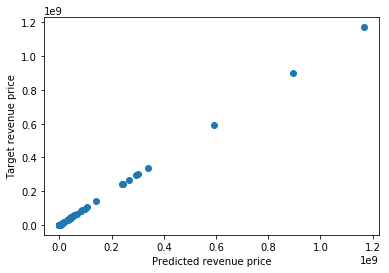

In [53]:
y_pred = grid_SVR.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted revenue price')
plt.ylabel('Target revenue price')
plt.show()

The correlation is quite strong; we can clearly see the upward trend and that the points are not too dispersed. That means our model predictions are pretty good.

### Second supervised learning model using Stochastic Gradient Descent

In [54]:
#Stochastic Gradient Descent
# SGD full-batch
from sklearn import linear_model
#model = SGDClassifier(loss= 'log', alpha = 1, tol = 0.00001, max_iter = 1000, shuffle = False, random_state = 0)
#param_grid = {'loss': ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'max_iter': [50, 1000, 3000], 'tol' : [0.1, 0.01, 0.001]}
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(linear_model.SGDRegressor(),param_grid,refit=True,verbose=3)
# grid.fit(X_train,y_train)
# grid.score(X_train,y_train)
# predicted= grid.predict(X_test)


grid = linear_model.SGDRegressor(alpha=0.0001, loss='epsilon_insensitive', max_iter=50, tol=0.001)
grid.fit(X_train,y_train)
grid.score(X_train,y_train)
predicted= grid.predict(X_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=-224934.69889206215, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=-1099.632495117411, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=-457352.709039672, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=-4824950.641490699, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=-20500.749173068143, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=-22530.0794043945, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.001, score=-1220213.7189248425, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.001, score=-815748.2072889669, total=   0.2s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=50, tol=0.001, score=-140122.55054410867, total=   0.2s
[CV] loss=squared_loss, max_iter=1000, tol=0.1 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.1, score=-80627.85073159082, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.1 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.1, score=-469620022.99223423, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.1 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.1, score=-73716.80471334321, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.01 ......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.01, score=-264583.07131737063, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.01 ......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.01, score=-568310.9796088423, total=   0.2s
[CV] loss=squared_loss, max_iter=1000, tol=0.01 ......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.01, score=-418598.39885399287, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.001 .....................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=1000, tol=0.001, score=-90529.70965019373, total=   0.1s
[CV] loss=squared_loss, max_iter=1000, tol=0.001 .....................
[CV]  loss=squared_loss, max_iter=1000, tol=0.001, score=-1588874.8158242607, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_loss, max_iter=1000, tol=0.001 .....................
[CV]  loss=squared_loss, max_iter=1000, tol=0.001, score=-252.63487104177878, total=   0.1s
[CV] loss=squared_loss, max_iter=3000, tol=0.1 .......................

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV]  loss=squared_loss, max_iter=3000, tol=0.1, score=-19338.18443674533, total=   0.1s
[CV] loss=squared_loss, max_iter=3000, tol=0.1 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=3000, tol=0.1, score=-153139.25596682535, total=   0.1s
[CV] loss=squared_loss, max_iter=3000, tol=0.1 .......................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=3000, tol=0.1, score=-249.51793709707678, total=   0.1s
[CV] loss=squared_loss, max_iter=3000, tol=0.01 ......................
[CV]  loss=squared_loss, max_iter=3000, tol=0.01, score=-698201.4486745541, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_loss, max_iter=3000, tol=0.01 ......................
[CV]  loss=squared_loss, max_iter=3000, tol=0.01, score=-80618.6843652758, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_loss, max_iter=3000, tol=0.01 ......................
[CV]  loss=squared_loss, max_iter=3000, tol=0.01, score=-432088.9683657068, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_loss, max_iter=3000, tol=0.001 .....................
[CV]  loss=squared_loss, max_iter=3000, tol=0.001, score=-40552296.69453954, total=   0.1s
[CV] loss=squared_loss, max_iter=3000, tol=0.001 .....................

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV]  loss=squared_loss, max_iter=3000, tol=0.001, score=-39721.93126500968, total=   0.0s
[CV] loss=squared_loss, max_iter=3000, tol=0.001 .....................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_loss, max_iter=3000, tol=0.001, score=-11954.823888960233, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.1 ................................
[CV]  loss=huber, max_iter=50, tol=0.1, score=0.5261456598803936, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.1 ................................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=50, tol=0.1, score=0.45393434596957216, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.1 ................................
[CV]  loss=huber, max_iter=50, tol=0.1, score=0.4782604100010911, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.01 ...............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=50, tol=0.01, score=0.5416530310212684, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.01 ...............................
[CV]  loss=huber, max_iter=50, tol=0.01, score=0.4513287929260439, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.01 ...............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=50, tol=0.01, score=0.4807726286266608, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.001 ..............................
[CV]  loss=huber, max_iter=50, tol=0.001, score=0.5408876706833444, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.001 ..............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=50, tol=0.001, score=0.4431612614212552, total=   0.0s
[CV] loss=huber, max_iter=50, tol=0.001 ..............................
[CV]  loss=huber, max_iter=50, tol=0.001, score=0.47702566341377795, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.1 ..............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=1000, tol=0.1, score=0.5112863317266437, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.1 ..............................
[CV]  loss=huber, max_iter=1000, tol=0.1, score=0.45398834798748244, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.1 ..............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=1000, tol=0.1, score=0.491531921935542, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.01 .............................
[CV]  loss=huber, max_iter=1000, tol=0.01, score=0.5087644020443283, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.01 .............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=1000, tol=0.01, score=0.45530668005042285, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.01 .............................
[CV]  loss=huber, max_iter=1000, tol=0.01, score=0.4808806515892631, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.001 ............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=1000, tol=0.001, score=0.530299527037114, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.001 ............................
[CV]  loss=huber, max_iter=1000, tol=0.001, score=0.4808469790338431, total=   0.0s
[CV] loss=huber, max_iter=1000, tol=0.001 ............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=1000, tol=0.001, score=0.48152772484745554, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.1 ..............................
[CV]  loss=huber, max_iter=3000, tol=0.1, score=0.5195858202604688, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.1 ..............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=3000, tol=0.1, score=0.43818551061644606, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.1 ..............................
[CV]  loss=huber, max_iter=3000, tol=0.1, score=0.4716437088615647, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.01 .............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=3000, tol=0.01, score=0.5374615633553924, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.01 .............................
[CV]  loss=huber, max_iter=3000, tol=0.01, score=0.45399160849170367, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.01 .............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=3000, tol=0.01, score=0.4729155014659807, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.001 ............................
[CV]  loss=huber, max_iter=3000, tol=0.001, score=0.5209499396470638, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.001 ............................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=huber, max_iter=3000, tol=0.001, score=0.45889688736928436, total=   0.0s
[CV] loss=huber, max_iter=3000, tol=0.001 ............................
[CV]  loss=huber, max_iter=3000, tol=0.001, score=0.47223227632987463, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.1 ..................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.1, score=0.8065696192799529, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.1 ..................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.1, score=0.9634967179689795, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.1 ..................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.1, score=0.9462597736158099, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.8342688606807286, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.9845791201766178, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.9857071068468757, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.001, score=0.8739441098789592, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.001, score=0.973274576946281, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.001, score=0.9782330018004339, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.1 ................
[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.1, score=0.8729249536187861, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.1 ................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.1, score=0.9662794201253833, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.1 ................
[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.1, score=0.9492730452630335, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.01 ...............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.01, score=0.8672042059320916, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.01 ...............
[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.01, score=0.9562247058030959, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.01 ...............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.01, score=0.9605291834659104, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.001 ..............
[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.001, score=0.8034531748369361, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.001 ..............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.001, score=0.9616800513911067, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=1000, tol=0.001 ..............
[CV]  loss=epsilon_insensitive, max_iter=1000, tol=0.001, score=0.9695076800871045, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.1 ................
[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.1, score=0.8175567413253146, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.1 ................


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.1, score=0.9612668702425948, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.1 ................
[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.1, score=0.9598555161169996, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.01 ...............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.01, score=0.7831545647163667, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.01 ...............
[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.01, score=0.946502232897338, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.01 ...............
[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.01, score=0.9611365250734258, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.001 ..............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.001, score=0.8304943290264903, total=   0.1s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.001 ..............
[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.001, score=0.9777693470348728, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=3000, tol=0.001 ..............


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=epsilon_insensitive, max_iter=3000, tol=0.001, score=0.9748521353073883, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.1 ..........
[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.1, score=-3.3696671929184547e+19, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.1 ..........
[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.1, score=-2.0906450587436752e+17, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.1 ..........


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.1, score=-1.300725937465743e+21, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.01 .........
[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.01, score=-4.505645122030194e+19, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.01 .........


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.01, score=-3.33823473654813e+16, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.01 .........
[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.01, score=-1489665554989575.2, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.001 ........


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.001, score=-422310058046690.4, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.001 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.001, score=-6.189276784204723e+20, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=50, tol=0.001 ........

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=50, tol=0.001, score=-1.5685748938558265e+21, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1, score=-574872032903269.6, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1, score=-884023769569.4705, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.1, score=-6.86482068779845e+21, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01 .......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01, score=-2327468602147262.0, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01 .......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01, score=-8025514653380144.0, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01 .......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.01, score=-1.9146494808314376e+18, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001, score=-4.198130907113585e+16, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001, score=-5.881494882613982e+21, total=   0.1s


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=1000, tol=0.001, score=-1.206295526481401e+21, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1, score=-9.807289637454571e+20, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1 ........


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1, score=-1.141111035189618e+16, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1 ........
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.1, score=-2981026079226787.5, total=   0.1s


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01 .......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01, score=-5.695605485232972e+20, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01 .......


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01, score=-67735008049216.44, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01 .......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.01, score=-697695283191005.5, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=-1.378695589337365e+19, total=   0.1s

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=-1.849263235468072e+21, total=   0.1s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001 ......


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   20.1s finished
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=-9.539038971343634e+19, total=   0.1s


In [55]:
print("\nThe model mean squared error is: ",mean_absolute_error(y_test,predicted))
print('\nMean Squared Error for test data:', mean_squared_error(y_test, predicted))  
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('\n R-squared:', r2_score(y_test, y_pred))

print("the best estimator ", grid.best_estimator_)
print("the best score ", grid.best_score_ )
print("the best params ", grid.best_params_)


The model mean squared error is:  0.03279605954550175

Mean Squared Error for test data: 0.029458721591503853

Root Mean Squared Error: 0.17163543221463293

 R-squared: 0.9993397105813683


The above model built using stochastic gradient descent helps us in 99.93% variations in the output with respect to the mean. This is quite similar to the Support Vector regressor. But the root mean squared error with SVR was 0.04 but with SGD it is 0.214 which means the error is high with SGD. In any regression problem our optimization approach is to find a model which gives us the least possible errors. Considering this though the r-squared is same in both the regression models we would prefer to use support vector regressor the given dataset. 

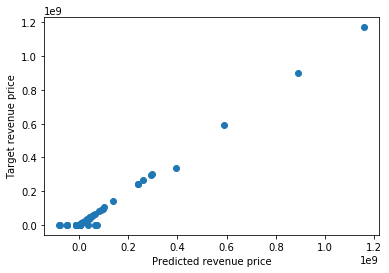

In [56]:
y_pred = grid.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted revenue price')
plt.ylabel('Target revenue price')
plt.show()

From the above plot we can see that the smaller revenue values our predictions are not quite strong. There is quite a deviation in the predicted and actual target values.

## UNSUPERVISED LEARNING ALGORITHMS

### K Means Clustering

K-Means is a very simple algorithm which clusters the data into K number of clusters.

Finding the best number of K (clusters/ groups) for the given dataset.

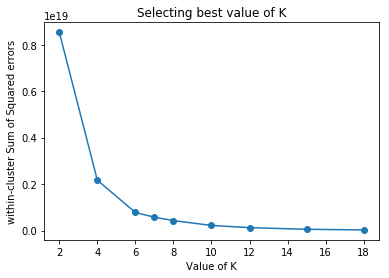

In [57]:
sse_auto = [] #Empty list to capture Sum of Squared error calculated using Euclidean distance at different values of K
sse_full = []
sse_elkan = []
from sklearn.cluster import KMeans
K = [2,4,6,7,8,10,12,15,18]
#k_algo = ['auto','full','elkan']
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=2018, algorithm ='auto')
    kmeans.fit(X_cust)
    sse_auto.append(kmeans.inertia_)

plt.plot(K, sse_auto, label='K means auto algorithm (area = %0.3f)', marker='o')
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K')
plt.show()


One of the metrics that is used to compare results at different values of K is mean distance to the centroid as a function of K, this plot is called the elbow curve. 
From the above figure we can see that from k=2 to k=6, there is good drop in Sum of squared distances of samples to their closest cluster center. But from approximately k=7 and k=12, the rate of decrease sharply shifted.

From the above curve we can see that the best number of clusters for the given dataset is k=6.

In [58]:
kmeans = KMeans(n_clusters = 6, random_state=2018, algorithm ='auto')
kmeans.fit(X_cust)
print("The within sum of squared errors is", kmeans.inertia_)
#To check the lables assigned by each cluster
print("The labels assigned by the algorithms is :", kmeans.labels_)
#To calculate the center point for each cluster. 
print("The cordinates of the cluster centers is :", kmeans.cluster_centers_)
#These centers are also called centroid. It gives the position of center for each cluster.


The within sum of squared errors is 7.789242818922615e+17
The labels assigned by the algorithms is : [0 0 0 ... 0 0 0]
The cordinates of the cluster centers is : [[ 2.25695178e+00  4.96454971e-01  4.59762659e+00 ...  4.52556947e-03
   3.17141851e-01  2.21149495e-01]
 [ 7.50000000e+00  0.00000000e+00  9.60000000e+01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 3.95833333e+00 -1.11022302e-16  4.28750000e+01 ...  8.67361738e-19
   1.25000000e-01  0.00000000e+00]
 [ 5.00000000e+00  0.00000000e+00  9.25000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.39473684e+00  5.55111512e-17  3.48289474e+01 ...  8.67361738e-19
   2.36842105e-01 -3.33066907e-16]
 [ 2.44444444e+00  0.00000000e+00  4.47777778e+01 ...  1.11111111e-01
  -5.55111512e-17  0.00000000e+00]]


In [59]:
correct = 0
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_test[i].astype(int):
        correct += 1
#     if (y_test[i].astype(int) > 0):
#         print("Predicted value is: ",prediction)
#         print("Actual value is :", y_test[i].astype(int))
    

print(correct/len(X_test))

0.99325


The model was able to cluster correctly with a 99.325% (accuracy of your model). 

### Second Unsupervised learning algorithm

### GAUSSIAN MIXTURE

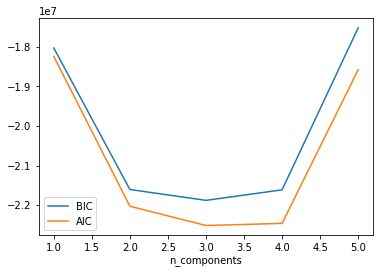

In [60]:
#Another unsupervised learning algorithms
#Gaussian Mixture
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 6)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_cust)
          for n in n_components]

plt.plot(n_components, [m.bic(X_cust) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_cust) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Gaussian Mixture is a generative model for which the determining the optimal number of components for a given dataset is important. To determine n_components, we can evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). 

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC and BIC curve tells us that our choice of 3 components above would have been a better choice. 

In [61]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X_cust)
labels = gmm.predict(X_cust)

probs = gmm.predict_proba(X_cust)
print(probs[:5].round(3))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


GaussianMixture is a probabilistic model and has method predict_proba which returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster. The above results states the probability of first 5 points.

## Unsupervised learning models for Dimentionally Reduction

In [62]:
#converting non zero values to 1
y_cust_binary = df_cust['TransactionRevenue'].apply(lambda x: 1 if x>0 else 0)

### PRINCIPAL COMPONENT ANALYSIS

Shape of input (20000, 230)
Shape of PCA component (20000, 2)
Explained Variance [0.95729038 0.04270962]
Total variance explained by 2 PCA components is:  [0.95729038 1.        ]


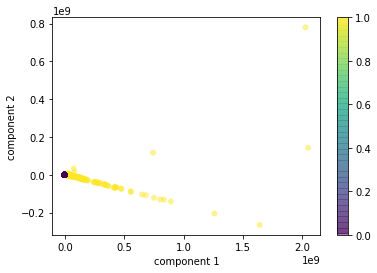

In [63]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, random_state=42).fit(X_cust)
projected = pca.fit_transform(X_cust)
print("Shape of input", X_cust.shape)
print("Shape of PCA component", projected.shape)
print("Explained Variance", pca.explained_variance_ratio_)
print("Total variance explained by 2 PCA components is: ",np.cumsum(pca.explained_variance_ratio_))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_cust_binary, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0.5,1,'Component-wise and Cumulative Explained Variance')

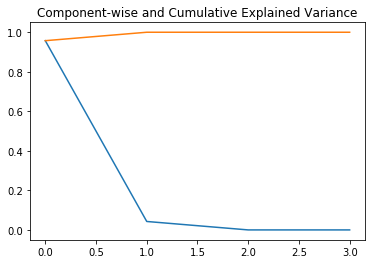

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_cust)

plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 100% variance in the dataset using just close to 2-3 components.

### Dimensionality reduction using Random Projections

In [65]:
from sklearn.random_projection import SparseRandomProjection
np.random.seed(42)
X = np.random.rand(100, 10000)
transformer = SparseRandomProjection(n_components=2, random_state=42)
X_new = transformer.fit_transform(X_cust)
X_new.shape

(20000, 2)

In [66]:
transformer.density_

0.0659380473395787

### Applying PCA to the Supervised learning models

### SUPERVISED REGRESSION with DIMENSIONALITY REDUCTION

#### SGD with reduced components using PCA

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(projected, y_cust, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)


print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y train", y_train.shape)
print("Shape of y test", y_test.shape)

Shape of X train (16000, 2)
Shape of X test (4000, 2)
Shape of y train (16000, 1)
Shape of y test (4000, 1)


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
model_PCA_SGD = linear_model.SGDRegressor(alpha=0.0001, loss='epsilon_insensitive', max_iter=50, tol=0.001)

model_PCA_SGD.fit(X_train,y_train)
model_PCA_SGD.score(X_train,y_train)
predicted_SGD= model_PCA_SGD.predict(X_test)

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted_SGD))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted_SGD))
print('\n R-squared:', r2_score(y_test, predicted_SGD))


The model mean absolute error is:  166900994434.0737

Mean Squared Error: 3.1380736294639854e+24

 R-squared: -1.2190596998329098e+24


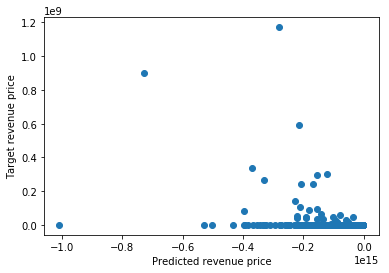

In [79]:
y_pred = model_PCA_SGD.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted revenue price')
plt.ylabel('Target revenue price')
plt.show()

#### SVR with reduced dimensions using PCA

In [70]:
from sklearn.svm import SVR
model_PCA_SVR = SVR(kernel='linear')

In [71]:
model_PCA_SVR.fit(X_train,y_train)
predicted= model_PCA_SVR.predict(X_test)

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('\n R-squared:', r2_score(y_test, predicted))


The model mean absolute error is:  0.09852218210492038

Mean Squared Error: 0.0097158819578223

Root Mean Squared Error: 0.09856917346626327

 R-squared: 0.9962256334485249


### SGD with Random Projections

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_cust, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)
                                
print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y train", y_train.shape)
print("Shape of y test", y_test.shape)

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Shape of X train (16000, 2)
Shape of X test (4000, 2)
Shape of y train (16000, 1)
Shape of y test (4000, 1)


In [74]:
model_RCA_SGD = linear_model.SGDRegressor(alpha=0.0001, loss='epsilon_insensitive', max_iter=50, tol=0.001)

model_RCA_SGD.fit(X_train,y_train)
model_RCA_SGD.score(X_train,y_train)
predicted_SGD= model_RCA_SGD.predict(X_test)

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted_SGD))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted_SGD))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted_SGD)))
print('\n R-squared:', r2_score(y_test, predicted_SGD))


The model mean absolute error is:  0.14903955421322956

Mean Squared Error: 2.702272729199754

Root Mean Squared Error: 1.643859096516412

 R-squared: -0.04976242469097114


From the above results we can see that after transforming the data there is a drop in the performance of the model. Probably even the best number of components are not able to explain the model better. Variance and density of data points is not a good parameter for dimension reduction in the given scenario.

### SVR with Randomized Projections

In [76]:
from sklearn.svm import SVR
model_RCA_SVR = SVR(kernel='linear')

In [77]:
model_RCA_SVR.fit(X_train,y_train)
predicted_SVM= model_RCA_SVR.predict(X_test)

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted_SGD))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted_SGD))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted_SGD)))
print('\n R-squared:', r2_score(y_test, predicted_SGD))


The model mean absolute error is:  0.14903955421322956

Mean Squared Error: 2.702272729199754

Root Mean Squared Error: 1.643859096516412

 R-squared: -0.04976242469097114


From the above results we can see that after transforming the data there is a drop in the performance of the model. The reason could be, there are number of categorical features which are converted to numerical using dummies. These categorical features might have not contributed to the target much as compared to actual integer features, whereas in reality they have high correction with the target variable. Many a times transformation algorithms fail to address false positives and false negatives.

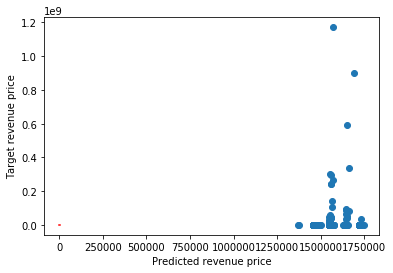

In [85]:
y_pred = model_RCA_SVR.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)
#y_pred_inv = y_normalizer.inverse_transform(y_pred)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted revenue price')
plt.ylabel('Target revenue price')
plt.show()

The above plot shows how the predicted and the actual values are correlated. From the above plot we can see that the model prepared after feature transformation is not doing good in terms of prediction.